In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Import all the files

In [351]:
visits = pd.read_csv('visits.csv',
                     parse_dates=[1])
cart = pd.read_csv('cart.csv',
                   parse_dates=[1])                  
checkout = pd.read_csv('checkout.csv',
                       parse_dates=[1])
purchase = pd.read_csv('purchase.csv',
                       parse_dates=[1])

Step 1: Inspect the DataFrames using `print` and `head`

In [352]:
print(visits.head(5))
print(cart.head(5))
print(checkout.head(5))
print(purchase.head(5))

                                user_id          visit_time
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00
                                user_id           cart_time
0  2be90e7c-9cca-44e0-bcc5-124b945ff168 2017-11-07 20:45:00
1  4397f73f-1da3-4ab3-91af-762792e25973 2017-05-27 01:35:00
2  a9db3d4b-0a0a-4398-a55a-ebb2c7adf663 2017-03-04 10:38:00
3  b594862a-36c5-47d5-b818-6e9512b939b3 2017-09-27 08:22:00
4  a68a16e2-94f0-4ce8-8ce3-784af0bbb974 2017-07-26 15:48:00
                                user_id       checkout_time
0  d33bdc47-4afa-45bc-b4e4-dbe948e34c0d 2017-06-25 09:29:00
1  4ac186f0-9954-4fea-8a27-c081e428e34e 2017-04-07 20:11:00
2  3c9c78a7-124a-4b77-8d2e-e1926e011e7d 2017-07-13 11:38:00
3  89fe330a-8966-4756-8f7c-3bdbcd47279a 

Step 2: Left merging visits and cart

In [353]:
visits_cart = pd.merge (visits,cart,how='left')
print(visits_cart.head())

                                user_id          visit_time  \
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   

            cart_time  
0                 NaT  
1 2017-01-26 14:44:00  
2 2017-08-20 08:31:00  
3                 NaT  
4                 NaT  


Step 3: How long is `visits_cart`?

In [354]:
visits_cart_count = visits_cart.user_id.count()
print(visits_cart_count)

2000


Step 4: How many timestamps are null for `cart_time`?

In [355]:
cart_time_nulls = visits_cart['cart_time'].isnull().sum()
print(cart_time_nulls)

1652


Step 5: What percentage only visited?

In [356]:
only_visits = round(float(cart_time_nulls/visits_cart.visit_time.count()*100),2)
print(only_visits)

82.6


Step 6: What percentage placed a t-shirt in their cart but did not checkout?

In [357]:
cart_checkout = pd.merge(cart,checkout,how='left')
print(cart_checkout.head())
cart_checkout_count = cart_checkout['cart_time'].count()
print(cart_checkout_count)
checkout_nulls = cart_checkout['checkout_time'].isna().sum()
print(checkout_nulls)
only_add_cart = round(float(checkout_nulls/cart_checkout_count*100),2)
print(only_add_cart)

                                user_id           cart_time  \
0  2be90e7c-9cca-44e0-bcc5-124b945ff168 2017-11-07 20:45:00   
1  4397f73f-1da3-4ab3-91af-762792e25973 2017-05-27 01:35:00   
2  a9db3d4b-0a0a-4398-a55a-ebb2c7adf663 2017-03-04 10:38:00   
3  b594862a-36c5-47d5-b818-6e9512b939b3 2017-09-27 08:22:00   
4  a68a16e2-94f0-4ce8-8ce3-784af0bbb974 2017-07-26 15:48:00   

        checkout_time  
0 2017-11-07 21:14:00  
1                 NaT  
2 2017-03-04 11:04:00  
3 2017-09-27 08:26:00  
4                 NaT  
348
122
35.06


Step 7: Merge it all together

In [358]:
all_data = visits.merge(cart, how='left').merge(checkout, how='left').merge(purchase, how='left')
print(all_data.head())
print(len(all_data))


                                user_id          visit_time  \
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   

            cart_time       checkout_time       purchase_time  
0                 NaT                 NaT                 NaT  
1 2017-01-26 14:44:00 2017-01-26 14:54:00 2017-01-26 15:08:00  
2 2017-08-20 08:31:00                 NaT                 NaT  
3                 NaT                 NaT                 NaT  
4                 NaT                 NaT                 NaT  
2108


Step 8: % of users who got to checkout but did not purchase

In [359]:
checkout_count = all_data["checkout_time"].count()
print(checkout_count)
not_purchase_count = all_data["purchase_time"].isnull().sum()
print(not_purchase_count)
checkout_purchase_rate = round(float(checkout_count/not_purchase_count*100),2)
print(checkout_purchase_rate)

334
1856
18.0


Step 9: check each part of the funnel, let's print all 3 of them again

In [360]:
print(f"People that only visited is not added to cart is: {only_visits}")
print(f"People that only added to cart but not checkout is: {only_add_cart}")
print(f"People that only checkout but did not purchase is: {checkout_purchase_rate}")

People that only visited is not added to cart is: 82.6
People that only added to cart but not checkout is: 35.06
People that only checkout but did not purchase is: 18.0


*The weakest part of the funnel is clearly getting a person who visited the site to add a tshirt to their cart. Once they've added a t-shirt to their cart it is fairly likely they end up purchasing it. A suggestion could be to make the add-to-cart button more prominent on the front page.*


Step 10: adding new column

In [361]:
all_data["time_to_purchase"] = all_data['purchase_time'] - all_data['visit_time']
print(all_data.head(5))

                                user_id          visit_time  \
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   

            cart_time       checkout_time       purchase_time time_to_purchase  
0                 NaT                 NaT                 NaT              NaT  
1 2017-01-26 14:44:00 2017-01-26 14:54:00 2017-01-26 15:08:00  0 days 00:44:00  
2 2017-08-20 08:31:00                 NaT                 NaT              NaT  
3                 NaT                 NaT                 NaT              NaT  
4                 NaT                 NaT                 NaT              NaT  


Step 11: examine the results

In [362]:
time_to_purchase_col= all_data["time_to_purchase"].dropna().to_string(index=False)
print(time_to_purchase_col)

0 days 00:44:00
0 days 00:38:00
0 days 00:41:00
0 days 01:00:00
0 days 01:00:00
0 days 00:34:00
0 days 00:35:00
0 days 00:53:00
0 days 00:36:00
0 days 00:25:00
0 days 00:31:00
0 days 00:49:00
0 days 00:48:00
0 days 00:55:00
0 days 00:53:00
0 days 00:24:00
0 days 00:27:00
0 days 00:32:00
0 days 00:37:00
0 days 01:02:00
0 days 01:12:00
0 days 00:52:00
0 days 00:51:00
0 days 00:44:00
0 days 00:47:00
0 days 00:51:00
0 days 00:20:00
0 days 00:28:00
0 days 00:26:00
0 days 00:33:00
0 days 00:29:00
0 days 00:58:00
0 days 00:32:00
0 days 00:32:00
0 days 00:44:00
0 days 00:55:00
0 days 01:04:00
0 days 00:40:00
0 days 00:24:00
0 days 00:25:00
0 days 00:37:00
0 days 00:24:00
0 days 01:03:00
0 days 00:56:00
0 days 01:12:00
0 days 00:29:00
0 days 00:52:00
0 days 01:08:00
0 days 00:12:00
0 days 00:31:00
0 days 00:49:00
0 days 00:50:00
0 days 00:41:00
0 days 00:29:00
0 days 00:20:00
0 days 00:32:00
0 days 00:29:00
0 days 00:43:00
0 days 00:35:00
0 days 01:05:00
0 days 01:01:00
0 days 01:10:00
0 days 0

Step 12: average time to purchase

In [363]:
avg_time = all_data["time_to_purchase"].mean()
print(avg_time)
std_dev = all_data["time_to_purchase"].std()
print(std_dev)
print(f"The average purchase time is: {avg_time} plus/minus {std_dev}")

0 days 00:43:12.380952380
0 days 00:14:42.168126436
The average purchase time is: 0 days 00:43:12.380952380 plus/minus 0 days 00:14:42.168126436


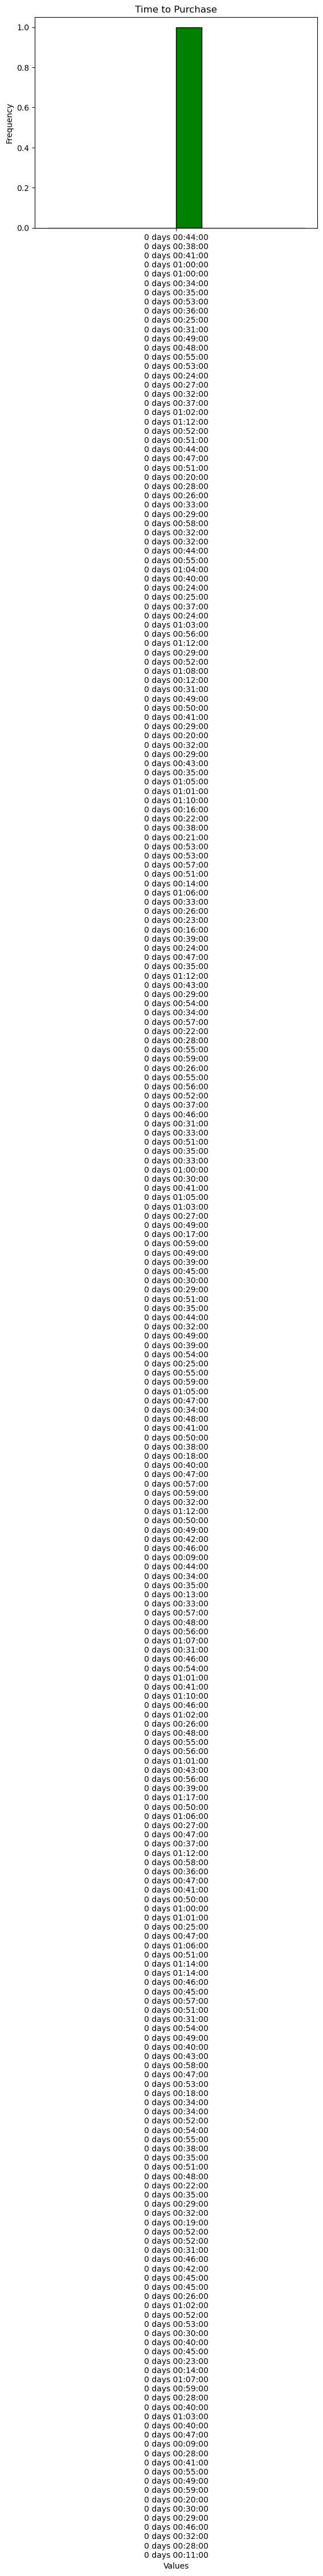

In [364]:
# Create histogram
plt.hist(time_to_purchase_col, bins=10, color='green', edgecolor='black')

# Label the axes
plt.xlabel('Values')
plt.ylabel('Frequency')

# Give the plot a title
plt.title('Time to Purchase')

# Display the plot
plt.show()